<h1 align="center">Física Computacional</h1>
<h1 align="center">Semestre 2025-4</h1>

<h2>Sergio A. Alcalá Corona</h2>
<h2>Rodrigo Vega Vilchis</h2>

---
### Alumno: Juan Alexis Hernández Hernández
---

<h1 align="center">Práctica 3. Integración numérica</h1>

In [4]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

### Integración numérica

#### **1. Regla del trapecio**: El archivo $\texttt{velocidades.txt}$ (adjunto) contiene dos columnas de números la primera representa el tiempo $t$ en segundos y la segunda la $x$-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo $t = 0$ hasta $t = 100$. Las primeras líneas se ven así:

$\texttt{0 0}$

$\texttt{1 0.069478}$

$\texttt{2 0.137694}$

$\texttt{3 0.204332}$

$\texttt{4 0.269083}$

$\texttt{5 0.331656}$

#### Escribe un programa para hacer lo siguiente:

#### **(a)** Lee los datos y, usando la **regla del trapecio**, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la dirección $x$ como una función del tiempo.




In [ ]:
velocidades = pd.read_csv("velocidades.txt",header=None,sep='\t')
velocidades

,0,1
0,0,0.000000
1,1,0.069478
2,2,0.137694
3,3,0.204332
4,4,0.269083
...,...,...
96,96,0.223073
97,97,0.254244
98,98,0.283753
99,99,0.311479


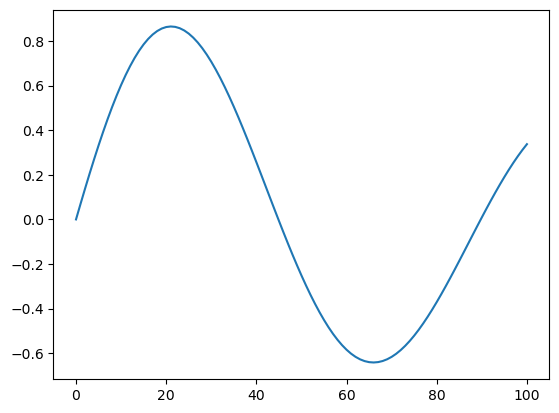

In [ ]:
t = velocidades[0]
v = velocidades[1]

pl.plot(t,v)

In [ ]:
def f(x):
    return v[int(x)]

N = 100 # Qué refinamiento tendrá la integral, el máx es 100 por la longitud de nuestros datos
def IntTrap(a,b):
    h = (b-a)/N
    p = f(a)+f(b)
    s = 0
    for k in range(0,N):
        s = s+f(a+k*h)
    return (h/2)*(p+s)

In [ ]:
IntTrap(0,99)

3.98488365000001

In [ ]:
def IntSimp(a,b):
    h = (b-a)/N
    p = f(a)+f(b)
    s1 = 0
    s2 = 0
    for k in range(1,int(N/2)+1):
        s1 = s1+f(a+(2*k-1)*h)
    for k in range(1,int(N/2)):
        s2 = s2+f(a+2*k*h)
    return (h/3)*(p + 4*s1 + 2*s2)

IntTrap(0,99)

3.98488365000001

#### **(b)** Extiende tu programa para hacer una gráfica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una función del tiempo.


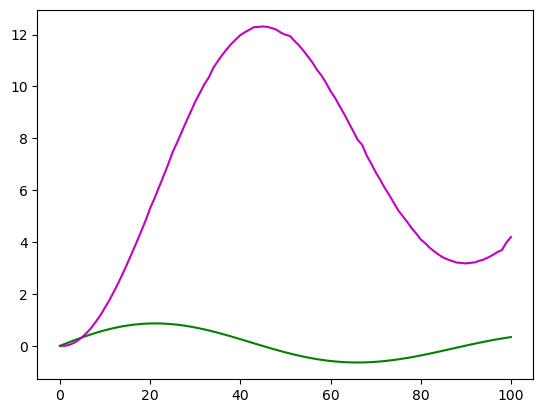

In [ ]:
l = []
for i in range(101):
    N = 100
    l.append(IntTrap(0,i))

pl.plot(t,v,'g')
pl.plot(t,l,'m')

#### **2. Integración numérica**

#### **(a)** Escribe un programa para calcular un valor aproximado para la integral

$$\int_0^2 (x^4-2x+1)\,dx$$

#### utilizando tanto la **regla del trapecio** como la **regla de Simpson** con 10 divisiones.

In [ ]:
def f(x):
    return x**4 - 2*x + 1

In [ ]:
def IntTrap(a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s = 0
    for k in range(0,N):
        s = s+f(a+k*h)
    return (h/2)*(p+s)

In [ ]:
def IntSimp(a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s1 = 0
    s2 = 0
    for k in range(1,int(N/2)+1):
        s1 = s1+f(a+(2*k-1)*h)
    for k in range(1,int(N/2)):
        s2 = s2+f(a+2*k*h)
    return (h/3)*(p + 4*s1 + 2*s2)

In [ ]:
IntTrap(0,2,10)

3.053280000000001

In [ ]:
IntSimp(0,2,10)

4.400426666666667

Según el resultado arrojado por Wolfram (4.4), el método de Simpson fue más preciso.

#### **(b)** Ejecuta el programa y compara tu resultado con el valor correcto conocido de $4,4$. ¿Cuál es el error en tu cálculo?

#### **(c)** Modifica el programa para utilizar 100 divisiones y luego 1000. ¿Cómo mejora el resultado?. ¿Cómo se comparan los resultados entre ambas reglas al usar la misma cantidad de divisiones?

In [ ]:
IntTrap(0,2,100)

2.280533328

In [ ]:
IntSimp(0,2,10)

4.400426666666667

In [ ]:
IntTrap(0,2,1000)

2.2080053333328

In [ ]:
IntSimp(0,2,1000)

4.400000000004267

#### **3. El límite de difracción de un telescopio**: Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a través de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción está dada por:

$$I(r) = \left( \frac{J_1(kr)}{kr} \right)^2$$

#### donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k = \frac{2\pi}{\lambda}$, y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m(x)$ están definidas por:

$$J_m(x) = \frac{1}{\pi} \int_0^\pi Cos\left( m\theta - xSin\theta \right)\,d\theta$$

#### donde $m$ es un entero no negativo y $x \geq 0$.

#### **(a)** Escribe una función $\texttt{J(m,x)}$ que calcule el valor de $J_m(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como una función de $x$ (de $x = 0$ a $x = 20$).

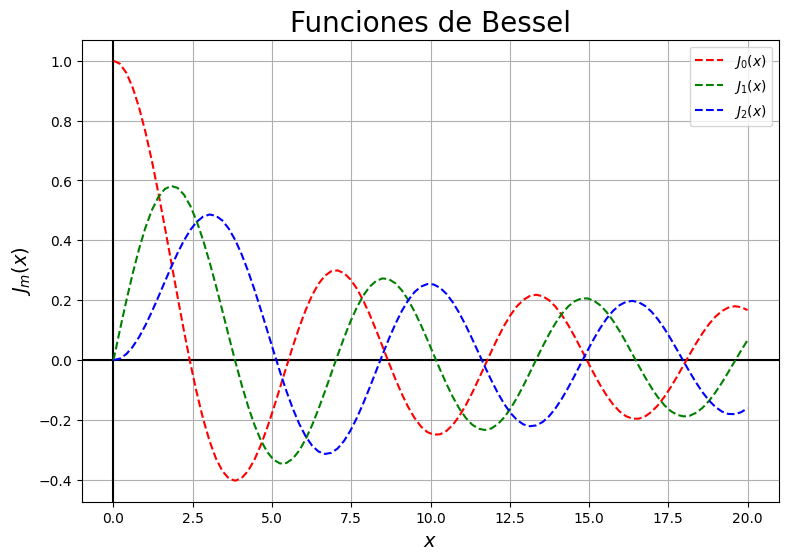

In [180]:
# Utilizamos la integral de Simpsion ya definida en el ejercicio anterior
def IntSimp(f,a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s1 = 0
    s2 = 0
    for k in range(1,int(N/2)+1):
        s1 = s1+f(a+(2*k-1)*h)
    for k in range(1,int(N/2)):
        s2 = s2+f(a+2*k*h)
    return (h/3)*(p + 4*s1 + 2*s2)

def Bessel(m,x):
    def f(T):
        return np.cos(m*T - x*np.sin(T))
    return (1/np.pi)*IntSimp(f,0,np.pi,1000)

x = np.linspace(0,20,100)
pl.figure(figsize=(9,6))
pl.title('Funciones de Bessel',size=20)
pl.xlabel(r'$x$',size=14)
pl.ylabel(r'$J_m(x)$',size=14)
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')
pl.plot(x,Bessel(0,x),'r--',label=r'$J_0(x)$')
pl.plot(x,Bessel(1,x),'g--',label=r'$J_1(x)$')
pl.plot(x,Bessel(2,x),'b--',label=r'$J_2(x)$')
pl.legend()
pl.grid()

In [181]:
Bessel(0,x)

array([ 1.        ,  0.98982296,  0.95960236,  0.91025932,  0.84329426,
        0.7607362 ,  0.66507419,  0.55917343,  0.44617906,  0.32941099,
        0.21225348,  0.09804337, -0.01003911, -0.10907316, -0.19649035,
       -0.27015437, -0.32842509, -0.37020465, -0.39496415, -0.40275042,
       -0.39417246, -0.37036864, -0.33295586, -0.2839627 , -0.22574926,
       -0.16091667, -0.09220966, -0.02241582,  0.04573474,  0.10966581,
        0.16704398,  0.21585707,  0.25447924,  0.28172071,  0.29686048,
        0.29966114,  0.29036549,  0.26967541,  0.23871408,  0.19897324,
        0.15224768,  0.10055964,  0.04607618, -0.00897731, -0.06240414,
       -0.11212048, -0.15623365, -0.19311159, -0.22144096, -0.24027192,
       -0.2490481 , -0.24762079, -0.23624704, -0.21557217, -0.18659738,
       -0.15063411, -0.10924706, -0.06418831, -0.01732511,  0.02943565,
        0.07422325,  0.11527649,  0.15101148,  0.18008152,  0.20142671,
        0.21431157,  0.21834926,  0.2135118 ,  0.2001259 ,  0.17

In [183]:
J0

[np.float64(1.0),
 np.float64(0.9898229554469248),
 np.float64(0.9596023623572276),
 np.float64(0.9102593152871776),
 np.float64(0.8432942560093817),
 np.float64(0.7607361974672548),
 np.float64(0.6650741838153246),
 np.float64(0.5591734208790147),
 np.float64(0.4461790513494239),
 np.float64(0.32941098038886696),
 np.float64(0.21225346447381516),
 np.float64(0.0980433482744251),
 np.float64(-0.010039134784319989),
 np.float64(-0.10907319363091676),
 np.float64(-0.19649038598045993),
 np.float64(-0.2701544197590643),
 np.float64(-0.32842515860636773),
 np.float64(-0.3702047249251048),
 np.float64(-0.3949642513955288),
 np.float64(-0.40275053787327175),
 np.float64(-0.3941725989333818),
 np.float64(-0.3703688110936926),
 np.float64(-0.3329560613310062),
 np.float64(-0.2839629345723852),
 np.float64(-0.22574953431631326),
 np.float64(-0.16091698742015922),
 np.float64(-0.09221002521089094),
 np.float64(-0.022416246675646224),
 np.float64(0.04573425136413239),
 np.float64(0.10966524936688

#### **(b)** Compara tus resultados con los proporcionados con la biblioteca de $\texttt{scipy}$ que implementa la regla de Simpson.

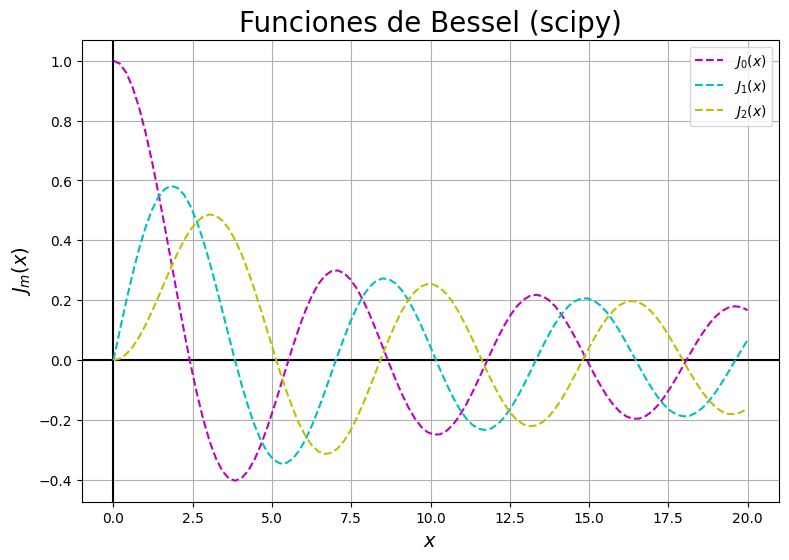

In [182]:
import scipy as sp

def Bessel(m,x):
    def f(T):
        return np.cos(m*T - x*np.sin(T))
    z = np.linspace(0,np.pi,100)
    return (1/np.pi)*sp.integrate.simpson(f(z),z)

x = np.linspace(0,20,100)
J0 = []
J1 = []
J2 = []
for i in x:
    J0.append(Bessel(0,i))
    J1.append(Bessel(1,i))
    J2.append(Bessel(2,i))

pl.figure(figsize=(9,6))
pl.title('Funciones de Bessel (scipy)',size=20)
pl.xlabel(r'$x$',size=14)
pl.ylabel(r'$J_m(x)$',size=14)
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')
pl.plot(x,J0,'m--',label=r'$J_0(x)$')
pl.plot(x,J1,'c--',label=r'$J_1(x)$')
pl.plot(x,J2,'y--',label=r'$J_2(x)$')
pl.legend()
pl.grid()

#### **(c)** Escribe un segundo programa que haga una gráfica de densidad ($\texttt{density plot}$) de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda = 500\,nm$, en una región cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de $r$ desde cero hasta aproximadamente $1\,\mu m$.

#### **Hint 1**: Puede resultarte útil saber que $\lim_{x \to 0} \frac{J_1(x)}{x} = \frac{1}{2}$

#### **Hint 2**: El punto central en el patrón de difracción es tan brillante que puede resultar difícil ver los anillos que lo rodean en la pantalla de la computadora; para solucionar esta situación, puedes usar el esquema de colores $\texttt{"hot"}$, que funciona bien. Tu gráfica debería verse algo así:

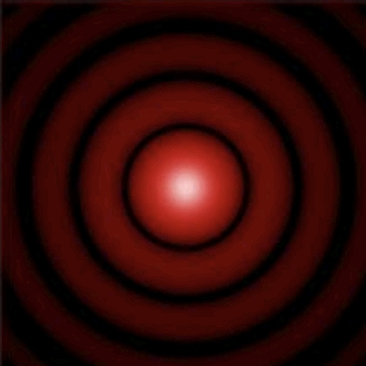


TypeError: Invalid shape (100,) for image data

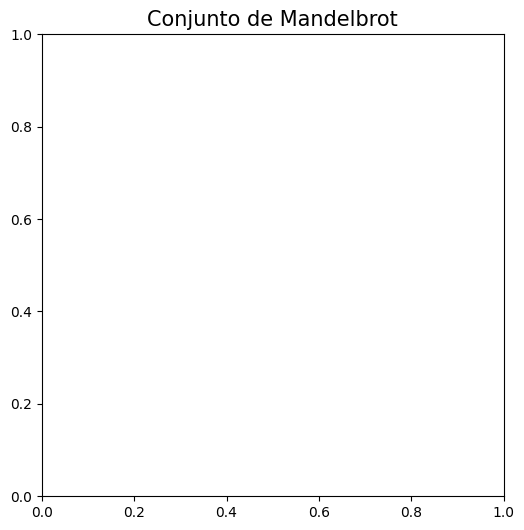

In [187]:
# Utilizamos la integral de Simpsion que definimos en el inciso
def IntSimp(f,a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s1 = 0
    s2 = 0
    for k in range(1,int(N/2)+1):
        s1 = s1+f(a+(2*k-1)*h)
    for k in range(1,int(N/2)):
        s2 = s2+f(a+2*k*h)
    return (h/3)*(p + 4*s1 + 2*s2)

def Bessel(m,x):
    def f(T):
        return np.cos(m*T - x*np.sin(T))
    return (1/np.pi)*IntSimp(f,0,np.pi,1000)

def I(r):
  L = 500*10**(-9)
  k = 2*np.pi/L
  if k*r == 0:
    return 1/2
  else:
    j1 = Bessel(1,k*r)
    return (j1/(k*r))**2

pl.figure(figsize=(6,6))
pl.title("Conjunto de Mandelbrot",fontsize=15)
pl.imshow(Bessel(0,x),cmap='hot')

#### **4. Capacidad calorífica de un sólido**: La *teoría de sólidos de Debye* establece que la *capacidad calorífica* de un sólido a una temperatura $T$ está dada por:

$$C_V = 9V\rho k_B \left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}\,dx$$

donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $k_B$ es la constante de Boltzmann y $\theta_D$ es la *temperatura de Debye*, una propiedad del material que depende de su densidad y de la velocidad del sonido en el sólido.

#### **(a)** Escribe una función $\texttt{Cv(T)}$ que calcule $C_V$ para un valor dado de temperatura, de una muestra que consta de $1000\,cm^3$ de aluminio sólido, con densidad numérica $\rho = 6.022 \times 10^{28}\,m^{-3}$ y una temperatura de Debye de $\theta_D = 428\,\text{K}$. Utiliza la **cuadratura gaussiana** para evaluar la integral, con $N = 50$ *puntos de muestreo*.

#### **(b)** Usa tu función para hacer una gráfica de la capacidad calorífica en función de la temperatura, desde $T = 5\,K$ hasta $T = 500\,K$.

#### **5. Atracción gravitacional de una lámina uniforme**: Una lámina de metal cuadrada uniforme flota inmóvil en el espacio:
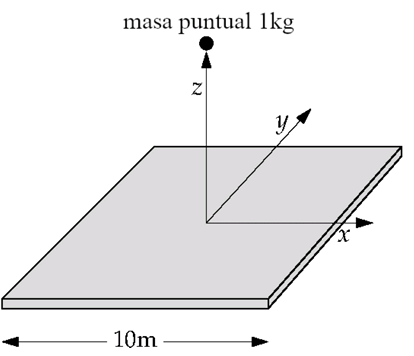

#### La lámina mide $10\,m$ de lado, tiene un espesor insignificante y una masa de $10$ toneladas.

#### **(a)** Considera la fuerza gravitacional debida a la placa que siente una masa puntual de $1\,kg$ a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ está dada por:

$$F_z = G\sigma z \int\int_{-L/2}^{L/2} \frac{1}{(x^2+y^2+z^2)^{3/2}}\,dxdy$$


donde $G = 6.674 \times 10^{-11}\,m^3\,kg^{-1}\,s^{-2}$ es la constante gravitacional de Newton, y $\sigma$ es la masa por unidad de área de la hoja.

#### **(b)** Escribe un programa para calcular y graficar la fuerza en función de $z$ de $z = 0$ hasta $z = 10\,m$. Para la integral doble utiliza la cuadratura Gaussiana (doble)

$$I = \approx \sum_{i=1}^{N} \sum_{j=1}^{N} \omega_i\omega_jf(x_i,y_j)$$
con 100 puntos de muestra a lo largo de cada eje.

#### **(c)** Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerza debería caer repentinamente a cero. Esta caída no es un efecto físico real, sino un artefacto numérico causado por la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategia para eliminarlo, o al menos disminuir su tamaño.

#### Este cálculo puede considerarse como un modelo de la atracción gravitacional de una galaxia. La mayor parte de la masa de una galaxia espiral (como nuestra Vía Láctea) se encuentra en un plano o disco delgado que pasa por el centro galáctico, y la atracción gravitacional ejercida por ese plano sobre cuerpos fuera de la galaxia se puede calcular con los métodos que hemos empleado aquí.


